In [1]:
#https://archive.ics.uci.edu/dataset/9/auto+mpg

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from ucimlrepo import fetch_ucirepo 

In [3]:
auto_mpg = fetch_ucirepo(id=9) 

In [4]:
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
print(X.head(20))

    displacement  cylinders  horsepower  weight  acceleration  model_year  \
0          307.0          8       130.0    3504          12.0          70   
1          350.0          8       165.0    3693          11.5          70   
2          318.0          8       150.0    3436          11.0          70   
3          304.0          8       150.0    3433          12.0          70   
4          302.0          8       140.0    3449          10.5          70   
5          429.0          8       198.0    4341          10.0          70   
6          454.0          8       220.0    4354           9.0          70   
7          440.0          8       215.0    4312           8.5          70   
8          455.0          8       225.0    4425          10.0          70   
9          390.0          8       190.0    3850           8.5          70   
10         383.0          8       170.0    3563          10.0          70   
11         340.0          8       160.0    3609           8.0          70   

In [5]:
#missing values
print(X.isnull().sum())

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [6]:
X['horsepower'].fillna(X['horsepower'].median(), inplace=True) #ignore warning

/tmp/ipykernel_211970/4199972687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['horsepower'].fillna(X['horsepower'].median(), inplace=True) #ignore warning


In [7]:
print(X.isnull().sum())

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [8]:
#visualizing the data


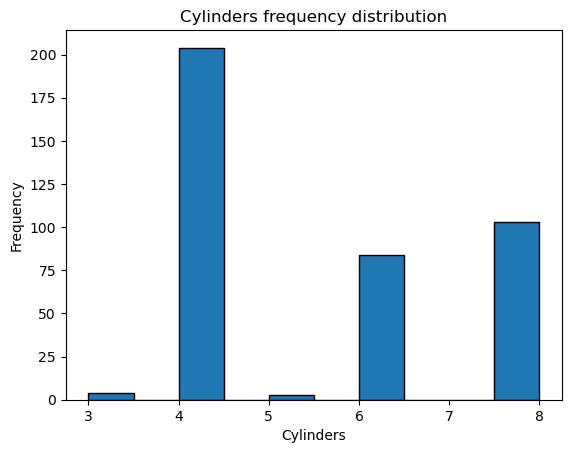

In [9]:
#frequency distribution of cylinders
plt.hist(X['cylinders'] , edgecolor="black")
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.title('Cylinders frequency distribution')
plt.show()

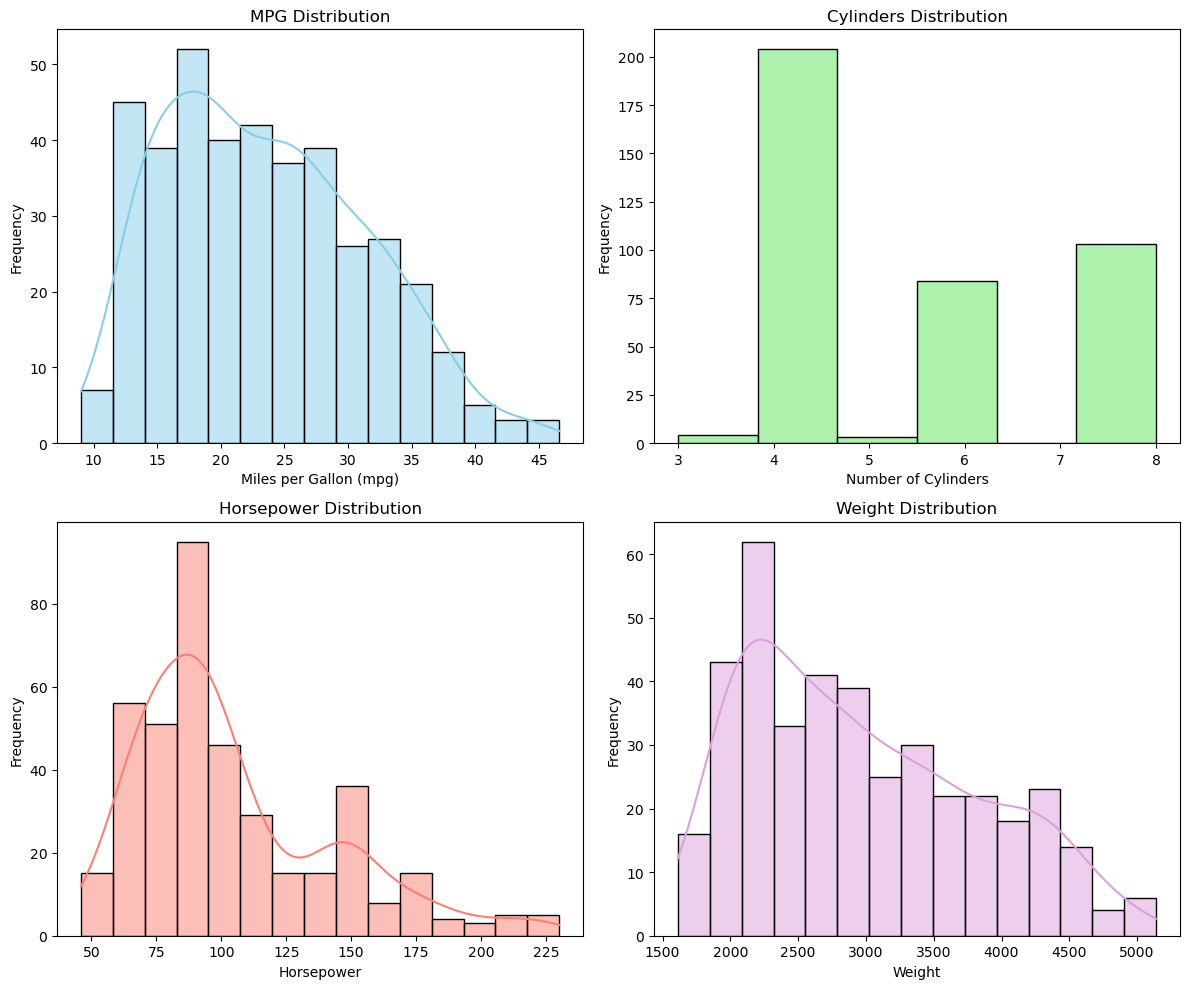

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MPG (continuous)
sns.histplot(y['mpg'], bins=15, kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('MPG Distribution')
axs[0, 0].set_xlabel('Miles per Gallon (mpg)')
axs[0, 0].set_ylabel('Frequency')

# Cylinders (discrete but KDE still plotted)
sns.histplot(X['cylinders'], bins=6, kde=False, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Cylinders Distribution')
axs[0, 1].set_xlabel('Number of Cylinders')
axs[0, 1].set_ylabel('Frequency')

# Horsepower (continuous)
sns.histplot(X['horsepower'], bins=15, kde=True, ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Horsepower Distribution')
axs[1, 0].set_xlabel('Horsepower')
axs[1, 0].set_ylabel('Frequency')

# Weight (continuous)
sns.histplot(X['weight'], bins=15, kde=True, ax=axs[1, 1], color='plum')
axs[1, 1].set_title('Weight Distribution')
axs[1, 1].set_xlabel('Weight')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [11]:
#Steam-and-Leaf
!pip install stemgraphic


error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [12]:
import stemgraphic


(<Figure size 750x200 with 1 Axes>, <Axes: >)

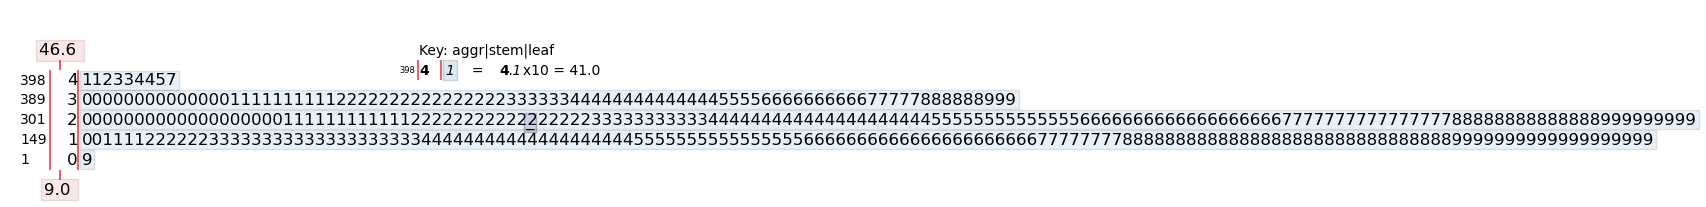

In [13]:
#using cleaned dataframe
stemgraphic.stem_graphic(y['mpg'],scale=10)

(<Figure size 750x575 with 1 Axes>, <Axes: >)

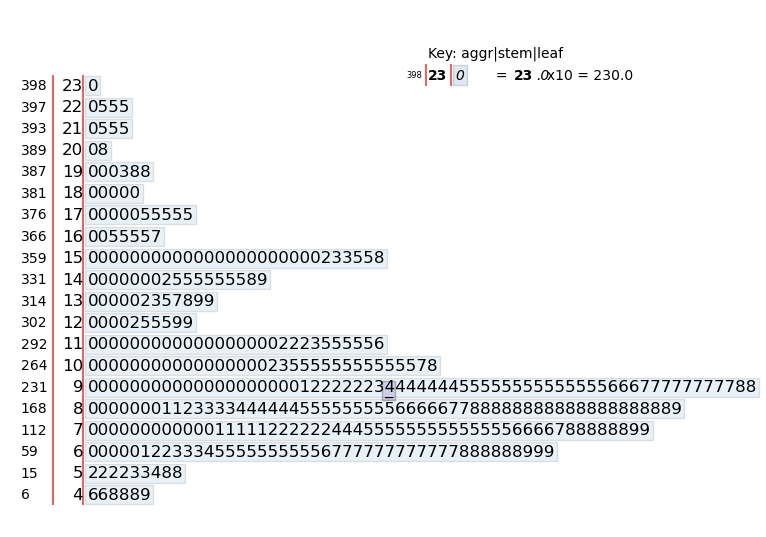

In [14]:
stemgraphic.stem_graphic(X['horsepower'],scale=10)

In [15]:
import scipy.stats as stats

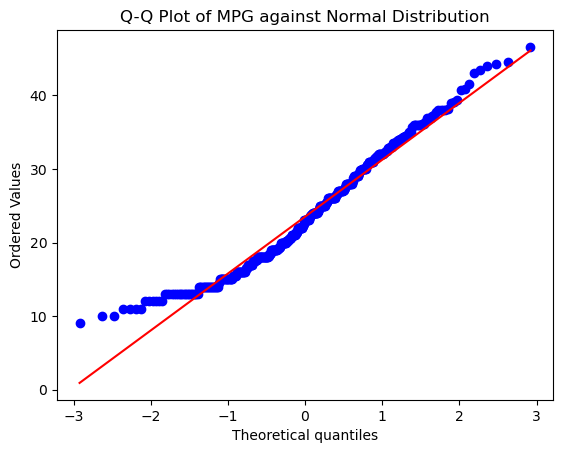

In [16]:
stats.probplot(y['mpg'], dist="norm", plot=plt)
plt.title("Q-Q Plot of MPG against Normal Distribution")
plt.show()

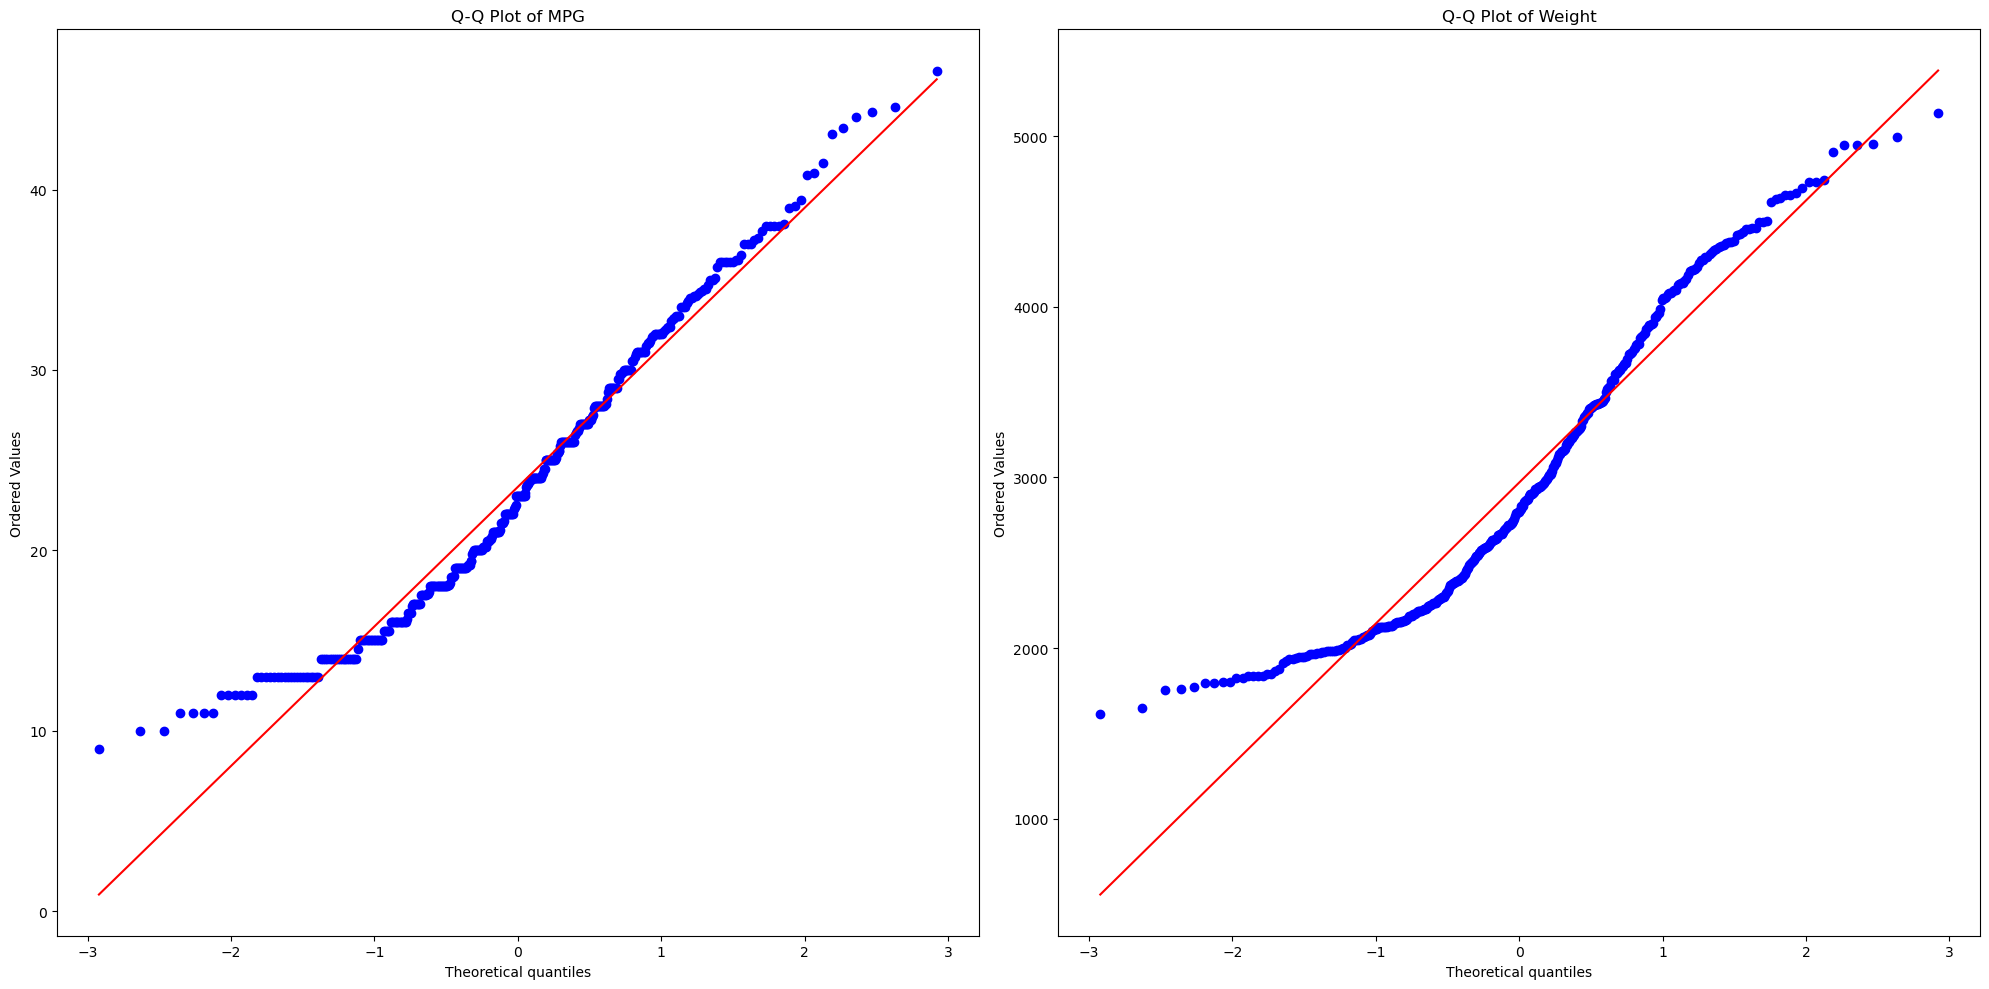

In [17]:
fig,axs = plt.subplots(1,2,figsize=(20,10))
#MPG
stats.probplot(y['mpg'], dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of MPG')

#Weight
stats.probplot(X['weight'], dist="norm", plot=axs[1])
axs[1].set_title('Q-Q Plot of Weight')

plt.tight_layout()
plt.show()


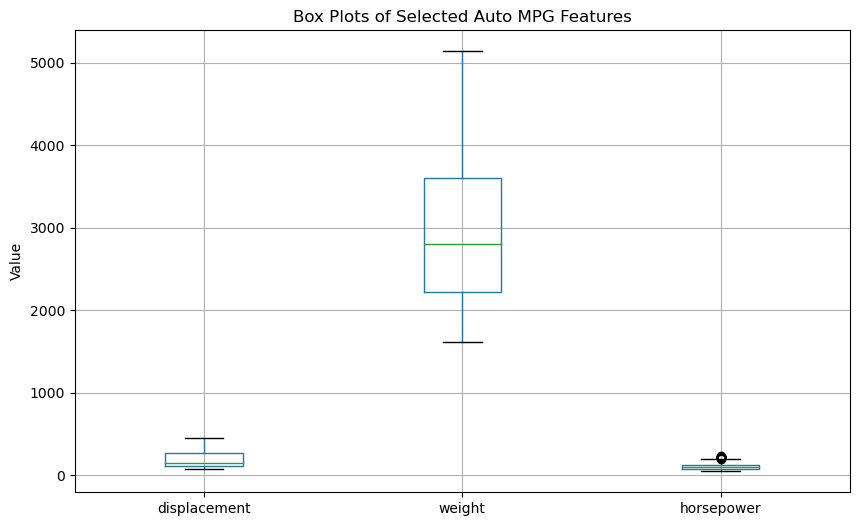

In [18]:
#box plot
numeric_cols = ['displacement', 'weight', 'horsepower']
cols = ['mpg']
plt.figure(figsize=(10, 6))
X[numeric_cols].boxplot()

plt.title('Box Plots of Selected Auto MPG Features')
plt.ylabel('Value')
plt.show()

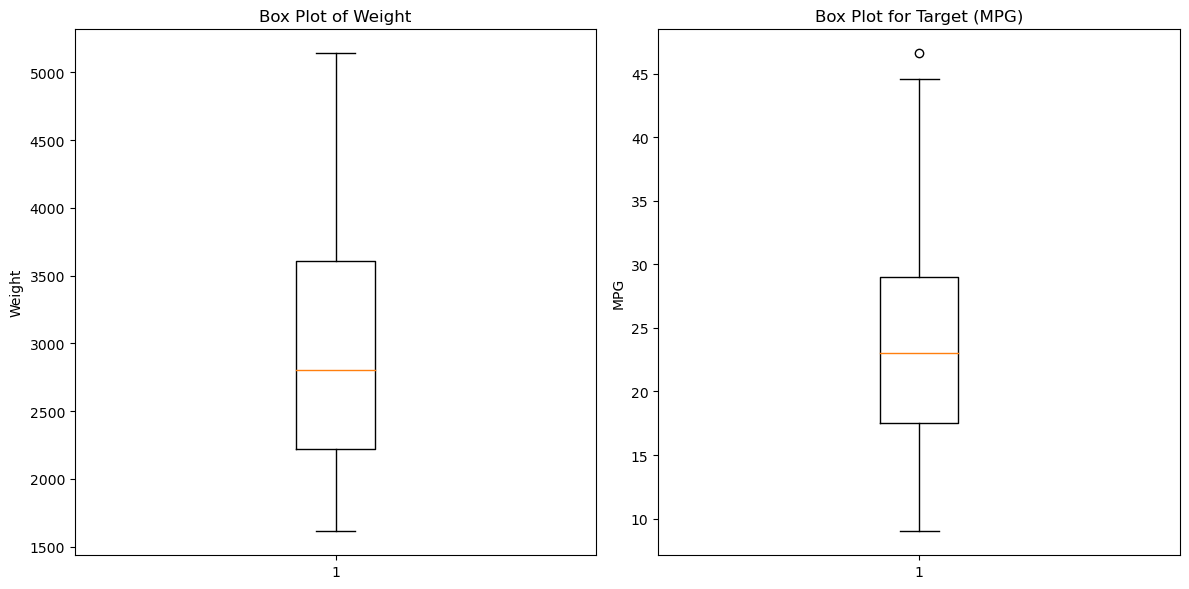

In [19]:

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for weight
axs[0].boxplot(X['weight'])
axs[0].set_title('Box Plot of Weight')
axs[0].set_ylabel('Weight')

# Boxplot for mpg 
axs[1].boxplot(y)
axs[1].set_title('Box Plot for Target (MPG)')
axs[1].set_ylabel('MPG')

plt.tight_layout()
plt.show()

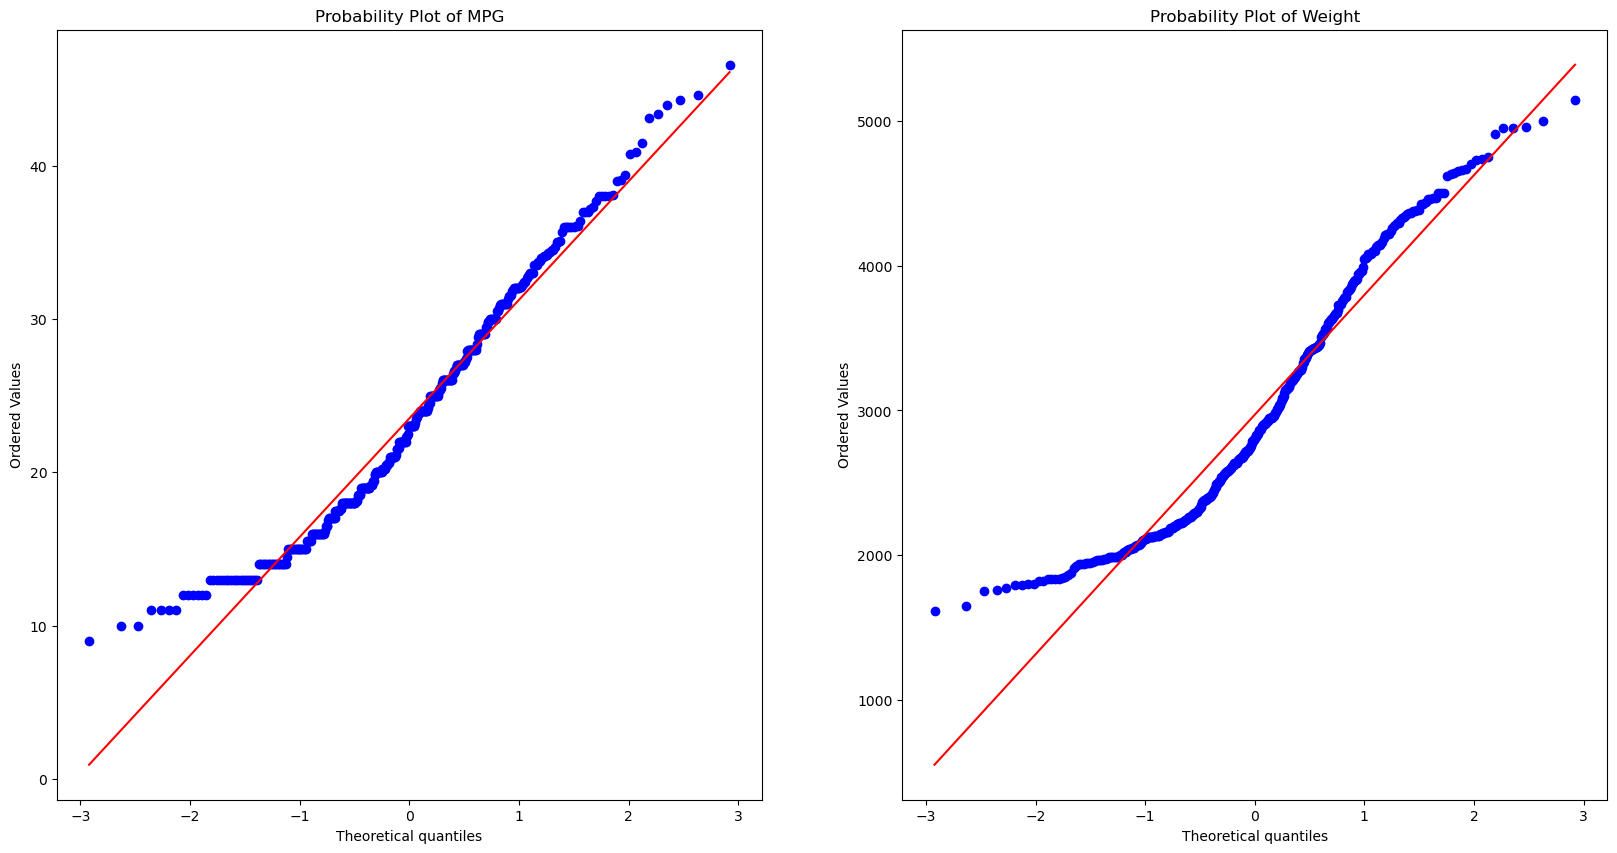

In [20]:
#probability plot
fig,axs = plt.subplots(1,2,figsize=(20,10))

stats.probplot(y['mpg'], dist="norm", plot=axs[0])
axs[0].set_title('Probability Plot of MPG')

stats.probplot(X['weight'], dist="norm", plot=axs[1])
axs[1].set_title('Probability Plot of Weight')

plt.show()